#### Define inputs to the attack

In [1]:
from ANNT import initiate_task
saved_model_location = r"/home/jovyan/sec_test_ml/logs/train_log/CW_model/mnist-FP/min-val_cross_entropy_loss"

randomize =False
model_name ="cw_mnist"
dataset = "mnist" #name of the dataset
attack_alg ="cw_l2"
#targeted = attack_params[1]
confidence_k = 0
#targeted = attack_params[1]
learning_rate = 0.01 
max_iter = 10
initial_const = 1    
batch_size = 1
binary_search_steps = 3
max_halving = 5
max_doubling = 5
sample_size = 50
attack_parameters = [confidence_k, learning_rate, max_iter, initial_const, batch_size, binary_search_steps, max_halving, max_doubling]
bitwidth=None

/home/jovyan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jovyan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jovyan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jovyan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: 

#### Create L2 attack

In [3]:
adv_images = initiate_task.begin_attack(saved_model_location, 
                                        model_name, 
                                        attack_alg, 
                                        attack_parameters, 
                                        dataset, 
                                        randomize=randomize, 
                                        sample_size=sample_size, 
                                        prefiltered=True, 
                                        iterations=1,
                                        bitwidth=bitwidth)

Creating adversarial examples based on the selected algorithm...
this is a custom class
Shuffle is: False
extracting images...
data shape is... (10000, 28, 28)
[0830 15:11:07 @logger.py:128] WRN Log directory logs/trained_images/mnist-FP exists! Use 'd' to delete it. 
[0830 15:11:07 @logger.py:131] WRN If you're resuming from a previous run, you can choose to keep it.
Press any other key to exit. 


Select Action: k (keep) / d (delete) / q (quit): d


[0830 15:11:12 @logger.py:92] Argv: /home/jovyan/.local/lib/python3.7/site-packages/ipykernel_launcher.py -f /home/jovyan/.local/share/jupyter/runtime/kernel-18986397-edd4-4620-8c8d-d56e6be91c91.json
Full precision custom model for cw attack selected. Model is defined in the attack paper
is training  False
[0830 15:11:12 @registry.py:90] 'conv0': [?, 28, 28, 1] --> [?, 28, 28, 32]
[0830 15:11:12 @registry.py:90] 'conv1': [?, 28, 28, 32] --> [?, 28, 28, 32]
[0830 15:11:12 @registry.py:90] 'pool0': [?, 28, 28, 32] --> [?, 14, 14, 32]
[0830 15:11:13 @registry.py:90] 'conv2': [?, 14, 14, 32] --> [?, 14, 14, 64]
[0830 15:11:13 @registry.py:90] 'conv3': [?, 14, 14, 64] --> [?, 14, 14, 64]
[0830 15:11:13 @registry.py:90] 'pool1': [?, 14, 14, 64] --> [?, 7, 7, 64]
[0830 15:11:13 @registry.py:90] 'fc0': [?, 7, 7, 64] --> [?, 200]
[0830 15:11:13 @registry.py:90] 'fc1': [?, 200] --> [?, 200]
[0830 15:11:13 @registry.py:90] 'linear': [?, 200] --> [?, 10]
Tensor("correct:0", shape=(?,), dtype=float

2023-08-30 15:11:13.355043: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-08-30 15:11:13.375846: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3000000000 Hz
2023-08-30 15:11:13.378316: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x20cbb10 executing computations on platform Host. Devices:
2023-08-30 15:11:13.378359: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>


[0830 15:11:13 @sessinit.py:114] Restoring checkpoint from /home/jovyan/sec_test_ml/logs/train_log/CW_model/mnist-FP/min-val_cross_entropy_loss ...
INFO:tensorflow:Restoring parameters from /home/jovyan/sec_test_ml/logs/train_log/CW_model/mnist-FP/min-val_cross_entropy_loss


2023-08-30 15:11:13.713995: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or set the envvar XLA_FLAGS=--xla_hlo_profile.


Computing accuracy of the network...
Number of batches created for 10000 data points in the dataset: 10


100%|##########|10/10[00:07<00:00, 1.38it/s]


logs/trained_images/mnist-FP
[0830 15:11:21 @inference_core.py:548] Total  benign images  classified correctly by the network : (9936, 28, 28) 
[0830 15:11:21 @inference_core.py:555] Total  benign images  classified incorrectly by the network : (64, 28, 28) 
[0830 15:11:21 @inference_core.py:123] The overall accuracy of the model: 0.9936, error: 0.0064 
PREPARING THE TOWER FUNCTION ....
is training  False
Tensor("correct:0", shape=(?,), dtype=float32)
[0830 15:11:21 @collection.py:146] New collections created in tower : logits of size 1
TOWER FUNCTION PREPARED....
output_shape: (?, 10)
input tensor: Tensor("input:0", shape=(?, 28, 28), dtype=float32)
output_tensor: Tensor("output:0", shape=(?, 10), dtype=float32)
1
[<tf.Tensor 'linear/output:0' shape=(?, 10) dtype=float32>]
these are the logits: Tensor("linear/output:0", shape=(?, 10), dtype=float32)
[0830 15:11:21 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, learning_rate

C&W L_2: 100%|██████████| 50/50 [00:57<00:00,  1.16s/it]


Adversarial images were crafted using SupportedAlgorithms.CW_L2 algorithm and were saved in location logs/trained_images/mnist-FP/mnist_conv_adv_pre-FP.npz


#### Visualize the generated images

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
(50, 28, 28)
(50,)
(50,)


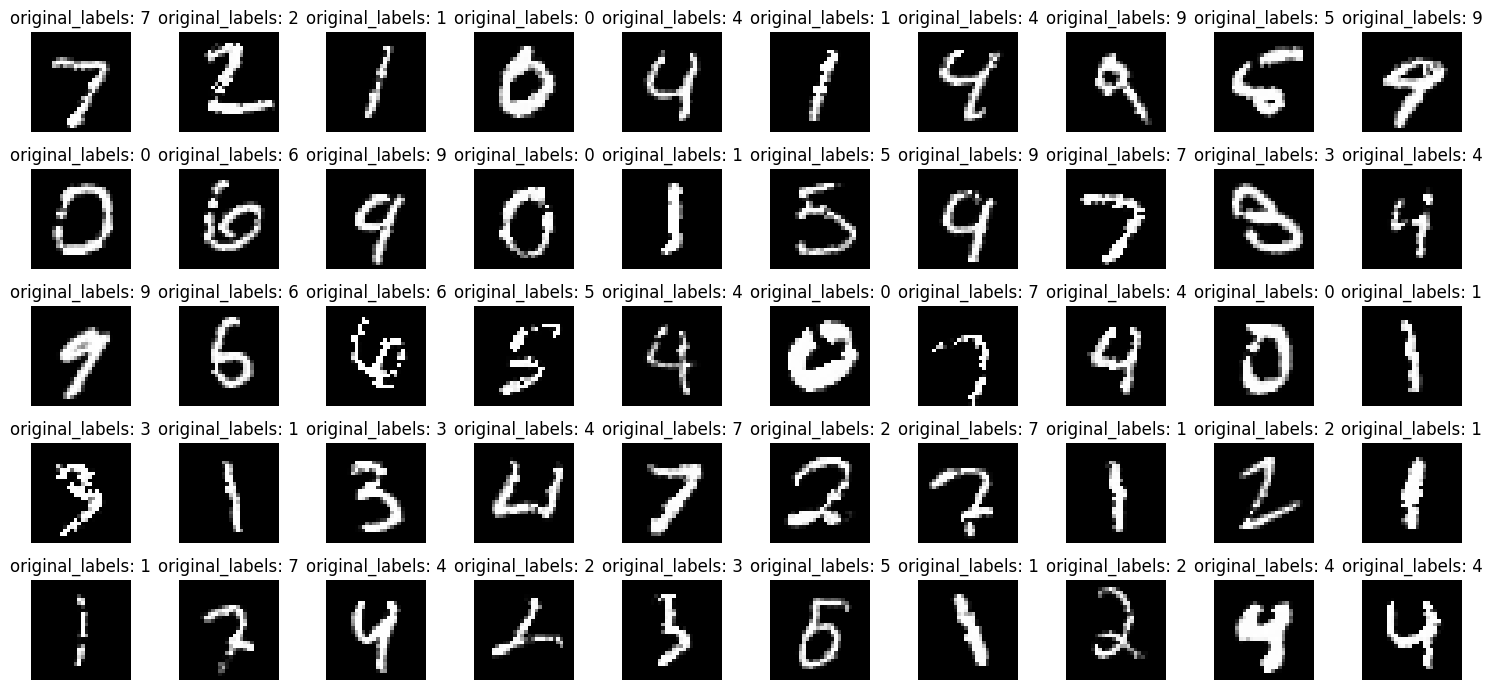

In [2]:
from ANNT import save_restore_images as saved, visualize_data as vz
import numpy as np

#give the location of the npz files
image_location= r"./logs/trained_images/mnist-FP/mnist_conv_adv_pre-FP--run-0.npz"

#load npz object from npz files
npz_image = saved.save_or_load_image__npz("load", image_location)

#load images
images = npz_image.images
shape_images = npz_image.images.shape
labels = npz_image.labels
shape_labels =  npz_image.labels.shape
#array of image index as stored in the original dataset
image_index =npz_image.image_index
image_index_shape =npz_image.image_index.shape

#view labels
print(npz_image.labels)
#view index
print(npz_image.image_index)
#print shapes
print(shape_images)
print(shape_labels)
print(image_index_shape)

#visualize images
number_of_images_to_visualize = 50
vz.plot_images_labels(images, npz_image.labels, number_of_images_to_visualize, "original_labels: ")

#### Visualize the images from the original dataset for comparision

this is a custom class
Shuffle is: ./MnistData
extracting images...
data shape is... (10000, 28, 28)
(10000, 28, 28)


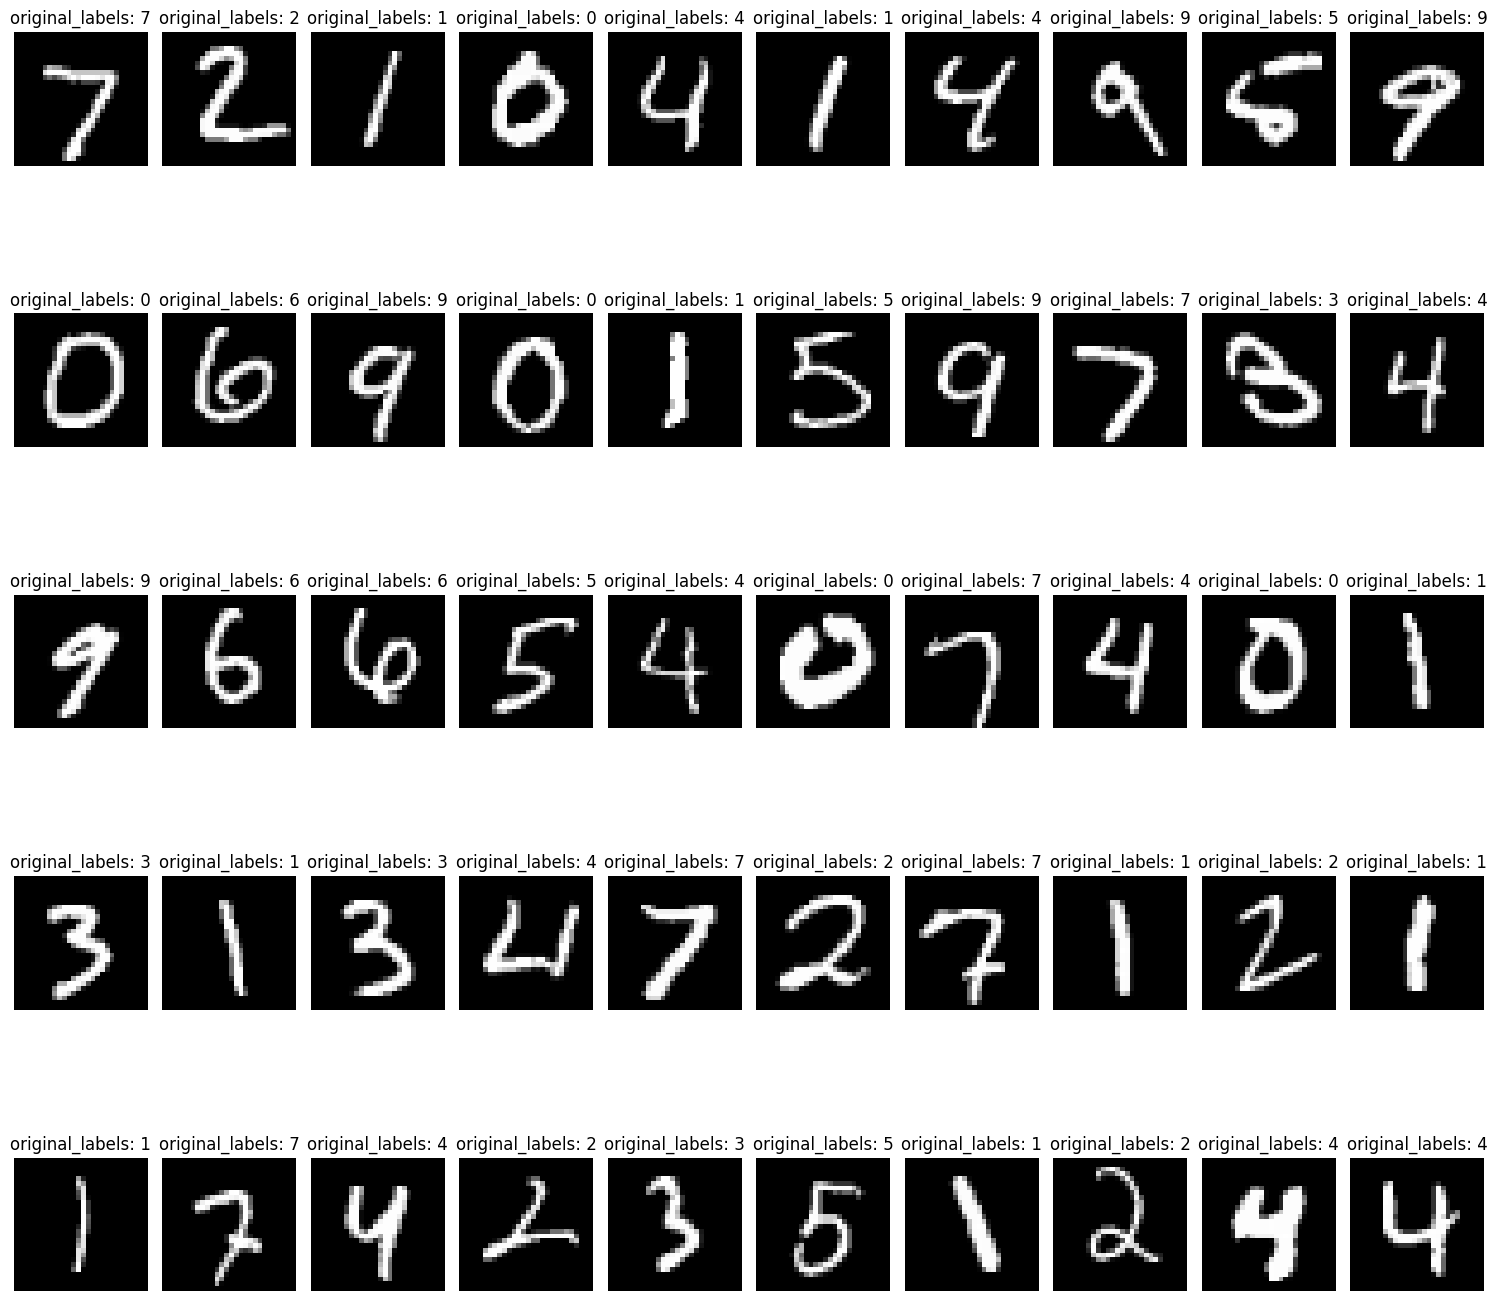

In [3]:
from ANNT.DataSets import mnist
from ANNT import visualize_data as vz
import numpy as np

#location of the mnist directory
Mnist_Data_Dir = r"./MnistData"

#load data
original_images_labels = mnist.GetMnist('test', Mnist_Data_Dir)

#print shape of tensor
print(original_images_labels.images.shape)

#visualize data
number_of_images_to_visualize = 50
#vz.plot_images_labels(original_images_labels.images, original_images_labels.labels, number_of_images_to_visualize, "original_labels: ")

#visualize data for particular index
vz.plot_images_labels_by_index(original_images_labels.images, original_images_labels.labels, npz_image.image_index, number_of_images_to_visualize, "original_labels: ")

#### Make inference on the adversarial images

In [20]:
import numpy as np
from ANNT import save_restore_images as saved
from ANNT.DataSets import mnist

Mnist_Data_Dir = r"./MnistData"
original_images_labels = mnist.GetMnist('test', Mnist_Data_Dir)

adv_image =  r"/home/jovyan/sec_test_ml/logs/trained_images/mnist-FP/mnist_conv_adv_pre-FP--run-0.npz"
loaded = saved.save_or_load_image__npz("load", adv_image)

model_name = "cw_mnist" #name of the model
dataset = "mnist" #name of the dataset
saved_model_location = r"/home/jovyan/sec_test_ml/logs/train_log/CW_model/mnist-FP/min-val_cross_entropy_loss"
accuracy_t1, error_t1, saved_corr_images, saved_false_images = initiate_task.begin_inference(saved_model_location, model_name,dataset, infer_images=adv_image)
print("Adversarial accuracy of the network against given set:{}".format(accuracy_t1))
print("Error rate of the network against given set:{}".format(error_t1))

this is a custom class
Shuffle is: ./MnistData
extracting images...
data shape is... (10000, 28, 28)
Performing inference on the selected model...
[0830 15:25:50 @logger.py:128] WRN Log directory logs/inference_log/mnist_mnist_conv_adv_pre-FP--run-0.npz-FP exists! Use 'd' to delete it. 
[0830 15:25:50 @logger.py:131] WRN If you're resuming from a previous run, you can choose to keep it.
Press any other key to exit. 


Select Action: k (keep) / d (delete) / q (quit): d


[0830 15:25:57 @logger.py:92] Argv: /home/jovyan/.local/lib/python3.7/site-packages/ipykernel_launcher.py -f /home/jovyan/.local/share/jupyter/runtime/kernel-18986397-edd4-4620-8c8d-d56e6be91c91.json
Full precision custom model for cw attack selected. Model is defined in the attack paper
Restoring images from location: /home/jovyan/sec_test_ml/logs/trained_images/mnist-FP/mnist_conv_adv_pre-FP--run-0.npz
is training  False
Tensor("correct:0", shape=(?,), dtype=float32)
[0830 15:25:58 @collection.py:146] New collections created in tower : logits of size 1
[0830 15:25:58 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, learning_rate
[0830 15:25:58 @sessinit.py:114] Restoring checkpoint from /home/jovyan/sec_test_ml/logs/train_log/CW_model/mnist-FP/min-val_cross_entropy_loss ...
INFO:tensorflow:Restoring parameters from /home/jovyan/sec_test_ml/logs/train_log/CW_model/mnist-FP/min-val_cross_entropy_loss
Computing accuracy of the 

100%|##########|1/1[00:00<00:00,24.99it/s]

logs/inference_log/mnist_mnist_conv_adv_pre-FP--run-0.npz-FP
[0830 15:25:58 @inference_core.py:548] Total  benign images  classified correctly by the network : (0,) 
[0830 15:25:58 @inference_core.py:555] Total  benign images  classified incorrectly by the network : (50, 28, 28) 
[0830 15:25:58 @inference_core.py:123] The overall accuracy of the model: 0.0, error: 1.0 
Adversarial accuracy of the network against given set:0.0
Error rate of the network against given set:1.0


/home/jovyan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jovyan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jovyan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jovyan/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: 

[3 1 7 6 9 7 9 8 6 4 2 8 4 5 5 3 4 3 9 9 7 5 8 3 9 6 3 9 2 9 9 4 5 0 3 8 2
 4 1 4 3 2 9 1 5 6 4 3 9 9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
(50, 28, 28)
(50,)
(50,)


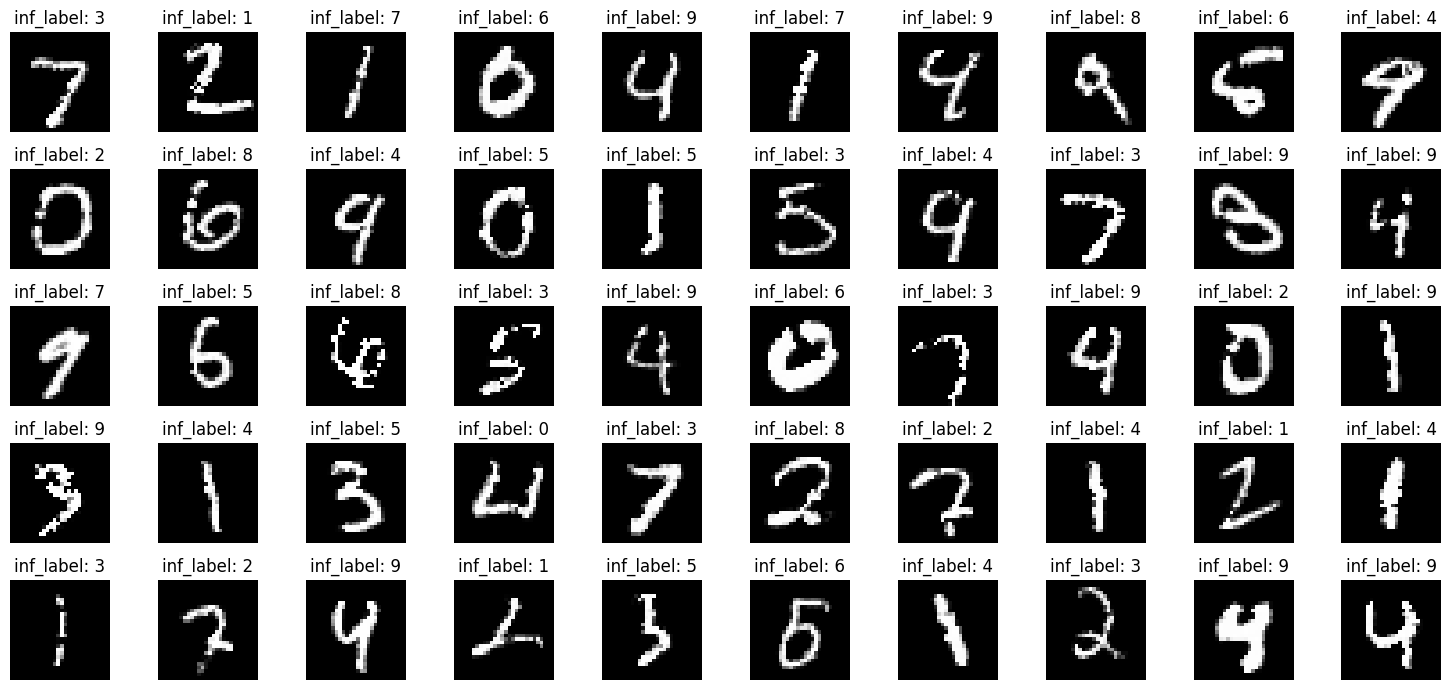

In [1]:
from ANNT import save_restore_images as saved, visualize_data as vz
import numpy as np

#give the location of the npz files
image_location= r"/home/jovyan/sec_test_ml/logs/inference_log/mnist_mnist_conv_adv_pre-FP--run-0.npz-FP/incorrect_pred_images.npz"

#load npz object from npz files
npz_image = saved.save_or_load_image__npz("load", image_location)

#load images
images = npz_image.images
shape_images = npz_image.images.shape
labels = npz_image.labels
shape_labels = labels = npz_image.labels.shape
#array of image index as stored in the original dataset
image_index =npz_image.image_index
image_index_shape =npz_image.image_index.shape


#view labels
print(npz_image.labels)
#view index
print(npz_image.image_index)
#print shapes
print(shape_images)
print(shape_labels)
print(image_index_shape)

#visualize images
vz.plot_images_labels(images, npz_image.labels, 50, "inf_label: ")